In [38]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# 한글 폰트 설정
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [51]:
# 데이타 로딩 - 기존 데이타셋과 다르기에 확인 필요
raw_data = pd.read_csv('./data/titanic.csv')
raw_data.info()

raw_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##  생존자와 사망자의 시각화

Text(0.5, 1.0, '타이타닉 생존자와 사망자')

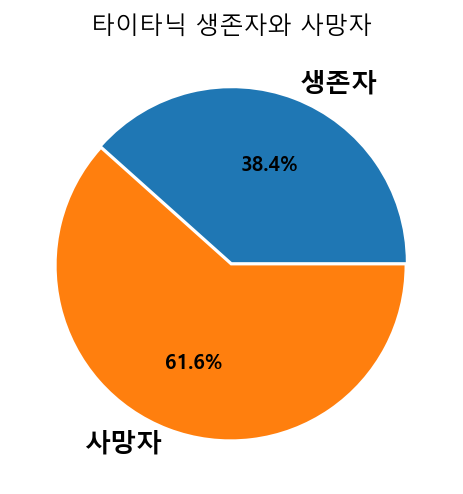

In [6]:
survive_cnt = raw_data[raw_data['Survived'] == 1].count()['Survived']
death_cnt = raw_data[raw_data['Survived'] == 0].count()['Survived']

fig1, ax1 = plt.subplots()
ax1.pie([survive_cnt,death_cnt], labels = ['생존자', '사망자'], autopct='%1.1f%%', explode=[0, 0.02])
ax1.set_title('타이타닉 생존자와 사망자')

# 연령분포 시각화

Text(0.5, 1.0, '연령별 분포도')

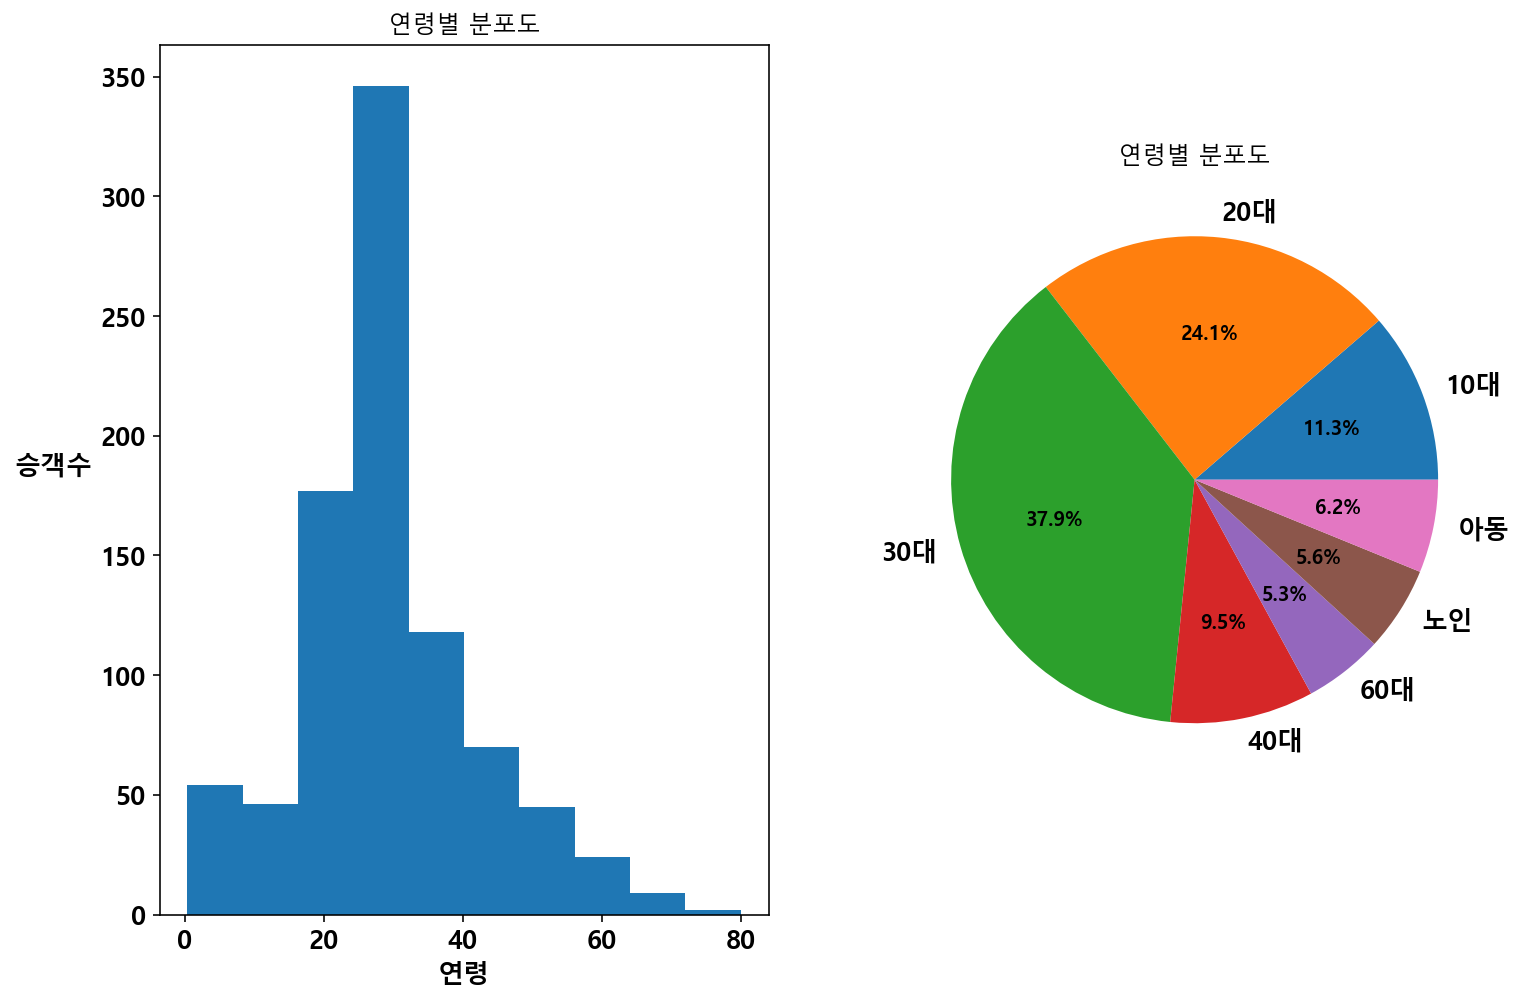

In [12]:
# 연령 구분 함수
def age(age):
    if age in range(0,10):
        return "아동"
    elif age in range(10,20):
        return "10대"
    elif age  in range(20,30):
        return "20대"
    elif age  in range(30,40):
        return "30대"
    elif age  in range(40,50):
        return "40대"
    elif age  in range(50,60):
        return "60대"
    else:
        return "노인"
    
# 함수 적용
raw_data['연령'] = raw_data['Age'].apply(age)

# fig,ax 초기화
fig1, ax = plt.subplots(1, 2, figsize=(12, 8))   

# 히스토그램
ax[0].hist(raw_data['Age'],bins=10);
ax[0].set_title('연령별 분포도')
ax[0].set_xlabel('연령')
ax[0].set_ylabel('승객수', rotation=0, ha='right')

# 원형그래프
age_cnt = raw_data.groupby('연령').count()['Age']
ax[1].pie(age_cnt.values, labels = age_cnt.index,autopct='%1.1f%%');
ax[1].set_title('연령별 분포도')

# 객실등급별로 각 평균 통계 - 표

In [70]:
group_class = raw_data.groupby(['Pclass', 'Survived', 'Sex'])
stat = group_class.describe()['Age']
stat

count       mean        std    min    25%   50%  \
Pclass Survived Sex                                                       
1      0        female    3.0  25.666667  24.006943   2.00  13.50  25.0   
                male     77.0  41.551948  14.159241  18.00  30.00  39.0   
       1        female   91.0  34.450549  12.631762  14.00  24.00  33.0   
                male     45.0  35.553778  14.201990   0.92  28.00  35.0   
2      0        female    6.0  36.000000  12.915107  24.00  26.25  32.5   
                male     91.0  33.109890  11.710585  16.00  25.00  30.0   
       1        female   70.0  28.135714  12.582459   2.00  22.00  28.5   
                male     17.0  17.666471  18.864742   0.67   1.00   8.0   
3      0        female   72.0  25.277778  11.500119   2.00  18.00  29.0   
                male    300.0  28.033333  10.341278   1.00  22.00  30.0   
       1        female   72.0  23.034722  11.146299   0.75  16.75  27.0   
                male     47.0  23.753617  10.809781   0.42  19.50  27.0   

                          75%   max  
Pclass Survived Sex                  
1      0        female  37.50  50.0  
                male    52.00  71.0  
       1        female  42.50  63.0  
                male    45.00  80.0  
2      0        female  42.50  57.0  
                male    36.75  70.0  
       1        female  34.75  55.0  
                male    31.00  62.0  
3      0        female  30.00  48.0  
                male    30.00  74.0  
       1        female  30.00  63.0  
                male    30.00  45.0

# 성별, 연령대, 객실등급별 생존자 시각화

Text(0.5, 1.0, '객실등급에 따른 생존자 비율')

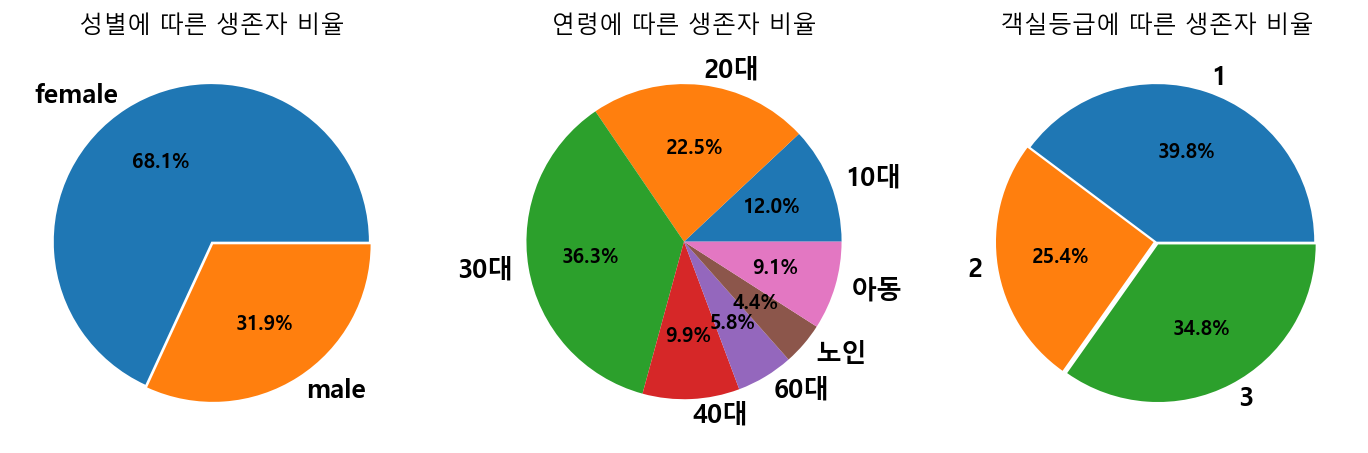

In [35]:
a = raw_data[raw_data['Survived']==1].groupby('Sex').count()['Survived']
b = raw_data[raw_data['Survived']==1].groupby('연령').count()['Survived']
c = raw_data[raw_data['Survived']==1].groupby('Pclass').count()['Survived']

fig1, ax = plt.subplots(1, 3, figsize=(12, 8))   
ax[0].pie(a.values, labels = a.index,autopct='%1.1f%%', explode=[0, 0.02]);
ax[0].set_title('성별에 따른 생존자 비율')
ax[1].pie(b.values, labels = b.index, autopct='%1.1f%%');
ax[1].set_title('연령에 따른 생존자 비율')
ax[2].pie(c.values, labels = c.index,autopct='%1.1f%%', explode=[0, 0.02, 0.02]);
ax[2].set_title('객실등급에 따른 생존자 비율')

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

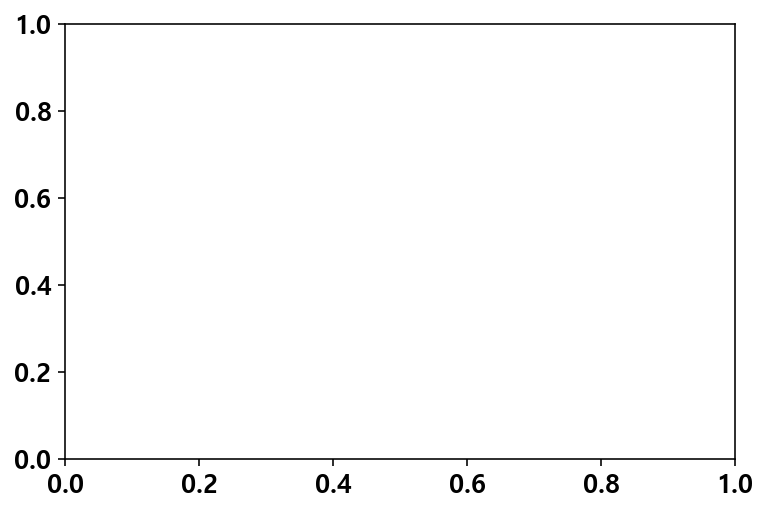

In [40]:
plt.subplot()
sns.violinplot(x=c, y=b, hue=raw_data[raw_data['Survived']==1].groupby('Sex'))

# 상관관계 분석하여 해석하기

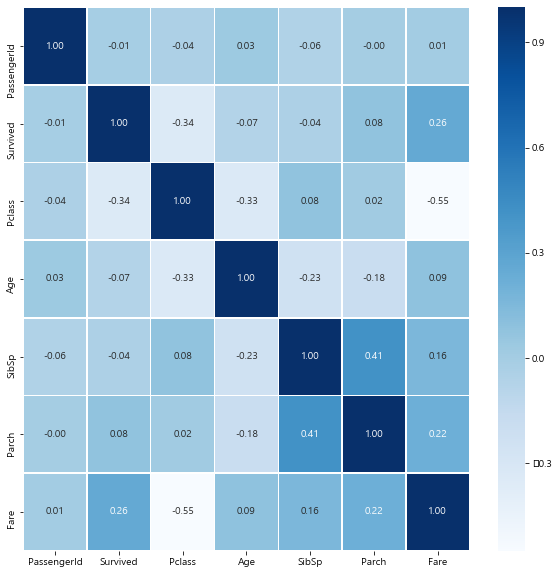

In [106]:
plt.figure(figsize=(10,10))

sns.heatmap(data = raw_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues');

